In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
images_dir = 'C:/naira_sentry/visuals'

In [2]:
df = pd.read_csv("../data/raw/nigeria_fraud_dataset_sample.csv")

In [3]:
df.head()

,transaction_id,timestamp,sender_account,receiver_account,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,...,txn_count_last_1h,txn_count_last_24h,total_amount_last_1h,time_since_last,avg_gap_between_txns,merchant_fraud_rate,channel_risk_score,persona_fraud_risk,location_fraud_risk,ip_geo_region
0,T2034401,2023-07-21 02:47:01.055982,7441272205,4571846757,transfer,Ikeja Electric Bill,Abuja,pos,False,NaN,...,6,6,7378523.91,34518.461470,38642.973422,0.035776,0.8,0.7,0.036211,North Central
1,T2248291,2023-06-07 11:03:20.188025,9988191875,6669799659,deposit,Other Transaction,Benin City,atm,False,NaN,...,1,1,5128957.90,0.000000,0.000000,0.035803,0.6,0.7,0.035913,South South
2,T2493704,2023-01-03 22:33:50.819063,8367511692,4676442189,payment,SportyBet Deposit,Ibadan,pos,False,NaN,...,1,1,222922.70,0.000000,0.000000,0.036328,0.6,0.7,0.035889,South West
3,T902324,2023-12-28 07:40:11.905973,8953452200,2509233225,transfer,SportyBet Deposit,Enugu,pos,False,NaN,...,7,7,1997386.94,11077.745979,63293.443248,0.036492,0.8,0.5,0.035556,South East
4,T667484,2023-10-22 18:17:06.609565,2142893289,3492957192,deposit,Other Transaction,Abuja,web,False,NaN,...,4,4,4800745.02,299745.917462,96357.972545,0.036387,0.3,0.4,0.035507,North Central


#### Time Engineering
: A transaction at 2:00 PM is normal. A transaction at 2:00 AM is suspicious. But the model doesn't know time. If we just give it "2024-11-25 02:00:00", it sees a unique string.

In [4]:
# Convert string to datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])
# Extract hour
df['hour'] = df['timestamp'].dt.hour
# Extract day of week
df["day_of_week"] = df['timestamp'].dt.dayofweek # 0 = Monday, 6 = Sunday

print(df[['timestamp', 'hour', 'day_of_week']].head())

                   timestamp  hour  day_of_week
0 2023-07-21 02:47:01.055982     2            4
1 2023-06-07 11:03:20.188025    11            2
2 2023-01-03 22:33:50.819063    22            1
3 2023-12-28 07:40:11.905973     7            3
4 2023-10-22 18:17:06.609565    18            6


#### Categorical Encoding


In [5]:
cols_to_encode = ['payment_channel', 'device_used', 'location', 'transaction_type']
le = LabelEncoder()

In [6]:
for col in cols_to_encode:
    df[f"{col}_code"] = le.fit_transform(df[col])

#### Logarithm Trick to fix skew

<function matplotlib.pyplot.show(close=None, block=None)>

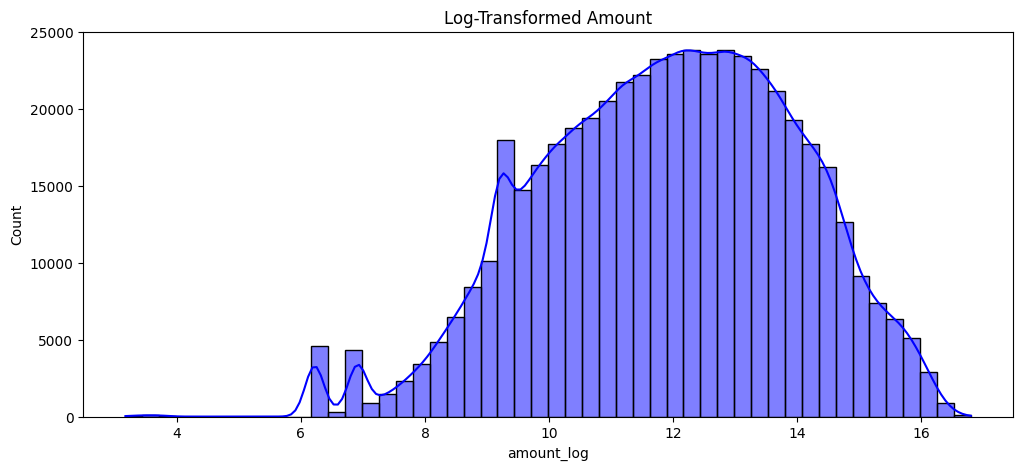

In [7]:
df['amount_log'] = np.log1p(df['amount_ngn'])
plt.figure(figsize = (12, 5))
sns.histplot(df['amount_log'], bins = 50, color = "blue", kde = True)
plt.title("Log-Transformed Amount")
plt.savefig(os.path.join(images_dir, "transformed_amount.png"))
plt.show

In [8]:
features = [
    'hour', 
    'day_of_week', 
    'payment_channel_code', 
    'device_used_code', 
    'location_code', 
    'transaction_type_code', 
    'amount_log'
]
X = df[features]
X.to_csv("../data/processed/train_data.csv", index=False)
df.to_csv('../data/processed/full_data.csv')